# Example

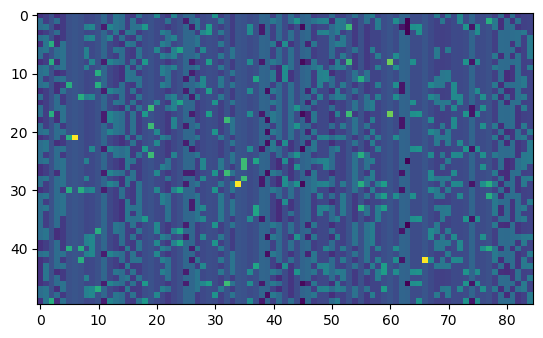

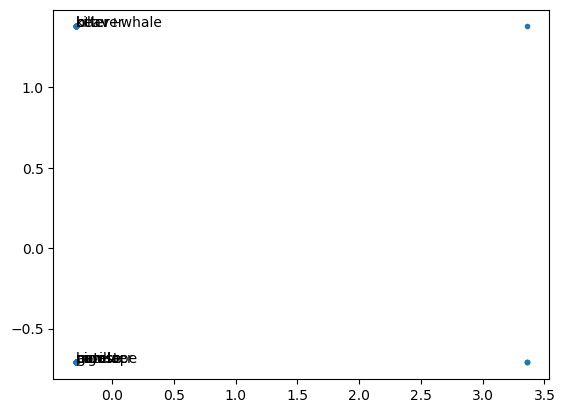

In [1]:
include("example_PCA.jl")

# 3.2 Data Visualization

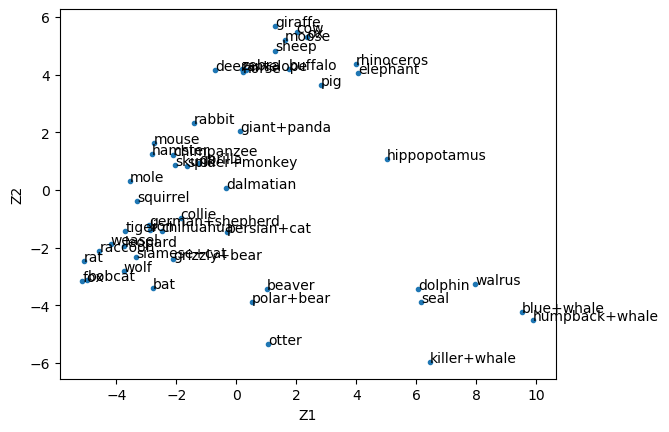

In [2]:
using DelimitedFiles
include("PCA.jl")

# Load data
dataTable = readdlm("animals.csv",',')
X = float(real(dataTable[2:end,2:end]))

# Standardize columns
include("misc.jl")
(X,mu,sigma) = standardizeCols(X)

# PCA
k=2
model = PCA(X,k)
Z=model.compress(X)

# Plot matrix as image
using PyPlot
figure(1)

# Show scatterplot of 2 latent features
plot(Z[:,1], Z[:,2], ".")
xlabel("Z1")
ylabel("Z2")
for i in 1:n
    annotate(dataTable[i+1,1],
    xy=[Z[i,1],Z[i,2]])
end

## 3.2.2 and 3.2.3 understanding the W matrix

In [3]:
indices = argmax(abs.(model.W), dims=2)

2×1 Array{CartesianIndex{2},2}:
 CartesianIndex(1, 12)
 CartesianIndex(2, 58)

In [4]:
print(dataTable[1,indices[1][2]+1], "\t", model.W[indices[1]])

furry	-0.2108873052528512

In [5]:
print(dataTable[1,indices[2][2]+1], "\t", model.W[indices[2]])

grazer	0.24636840620243042

# 3.3

In [6]:
using LinearAlgebra

In [7]:
1-(norm(Z*model.W - X)/norm(X))^2

0.30193815155914216

In [8]:
for k in 1:10
    model = PCA(X,k)
    Z=model.compress(X)
    var_expl = 1-(norm(Z*model.W - X)/norm(X))^2
    println(k, " ", var_expl)
end

1 0.17206878420566918
2 0.30193815155914216
3 0.3877924856402708
4 0.44860364372383943
5 0.5059016294867951
6 0.5472769825949826
7 0.585398960027595
8 0.6176035433127123
9 0.6489769689639804
10 0.6776318186946368
